*Read section 3.1 of the book before using these notes.*

*Note that in this course, lecture notes are not sufficient, you must read the book for better understanding. Lecture notes are just implementing the concepts of the book on a dataset, but not explaining the concepts elaborately.*

## Simple Linear Regression

### Learning objectives
By the end of this notebook you should be able to:
- Fit a simple linear regression model ($Y=\beta_0+\beta_1X+\varepsilon$) using `statsmodels` and `sklearn`.
- Interpret the slope and intercept in context.
- Evaluate model performance on a held-out test set (RMSE, MAE, $R^2$).
- Compute and visualize confidence intervals (mean response) vs prediction intervals (new observation).

### Data used
- Predictors: `Datasets/Car_features_train.csv`, `Datasets/Car_features_test.csv`
- Response: `Datasets/Car_prices_train.csv`, `Datasets/Car_prices_test.csv`

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

# Global plotting style (seaborn.set is deprecated)
sns.set_theme(style="whitegrid", font_scale=1.2)

**Develop a simple linear regression model that predicts car price based on engine size.**
Datasets to be used: *Car_features_train.csv, Car_prices_train.csv*

In [4]:
# We are reading training data ONLY at this point.
# Test data is already separated in another file
trainf = pd.read_csv('./Datasets/Car_features_train.csv') # Predictors
trainp = pd.read_csv('./Datasets/Car_prices_train.csv') # Response
train = pd.merge(trainf,trainp)
train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,18473,bmw,6 Series,2020,Semi-Auto,11,Diesel,145,53.3282,3.0,37980
1,15064,bmw,6 Series,2019,Semi-Auto,10813,Diesel,145,53.0430,3.0,33980
2,18268,bmw,6 Series,2020,Semi-Auto,6,Diesel,145,53.4379,3.0,36850
3,18480,bmw,6 Series,2017,Semi-Auto,18895,Diesel,145,51.5140,3.0,25998
4,18492,bmw,6 Series,2015,Automatic,62953,Diesel,160,51.4903,3.0,18990


### Training with [`statsmodels`](https://www.statsmodels.org/stable/index.html)

Here, we will use the `statsmodels.formula.api` module of the `statsmodels` library. The use of "API" here doesn't refer to a traditional external web API but rather an interface within the library for users to interact with and perform specific tasks. The `statsmodels.formula.api` module provides a formulaic interface to the `statsmodels` library. A formula is a compact way to specify statistical models using a formula language. This module allows users to define statistical models using formulas similar to those used in R.

So, in summary, the `statsmodels.formula.api` module provides a formulaic interface as part of the `statsmodels` library, allowing users to specify statistical models using a convenient and concise formula syntax.

In [5]:
# Let's create the model_sm
    
# ols stands for Ordinary Least Squares - the name of the algorithm that optimizes Linear Regression models

# data input needs the dataframe that has the predictor and the response
# formula input needs to:
    # be a string
    # have the following syntax: "response~predictor"
    
# Using engineSize to predict price
ols_object = smf.ols(formula = 'price~engineSize', data = train)

In [6]:
#Using the fit() function of the 'ols' class to fit the model_sm, i.e., train the model_sm
model_sm = ols_object.fit()

In [7]:
#Printing model_sm summary which contains among other things, the model_sm coefficients
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     3177.
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        22:28:15   Log-Likelihood:                -53949.
No. Observations:                4960   AIC:                         1.079e+05
Df Residuals:                    4958   BIC:                         1.079e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4122.0357    522.260     -7.893      0.000   -5145.896   -3098.176
engineSize  1.299e+04    230.450     56.361      0.000    1.25e+04    1.34e+04
==============================================================================
Omnibus:                     1271.986   Durbin-Watson:                   0.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6490.719
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                       8.122   Cond. No.                         7.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model equation is:
$\hat{price}$ = -4122.0357 + 12990 * `engineSize`

- R-squared is 39\%. This is the proportion of variance in car price explained by `engineSize`.
- The coef of `engineSize` ($\hat{\beta}_1$) is statistically significant ($p$-value = 0). There is a linear relationship between X and Y.
- The 95% CI of $\hat{\beta}_1$ is [1.25e+04, 1.34e+04].
- PI is not shown here.

The coefficient of `engineSize` is 1.299e+04.
- Unit change in `engineSize` increases the expected price by $\$$ 12,990. 
- An increase of 3 increases the price by $\$$ (3*1.299e+04) = $\$$ 38,970.

The coefficients can also be returned directly using the `params` attribute of the fitted `model_sm` object:

In [8]:
model_sm.params

Intercept     -4122.035744
engineSize    12988.281021
dtype: float64

**Visualize the regression line**

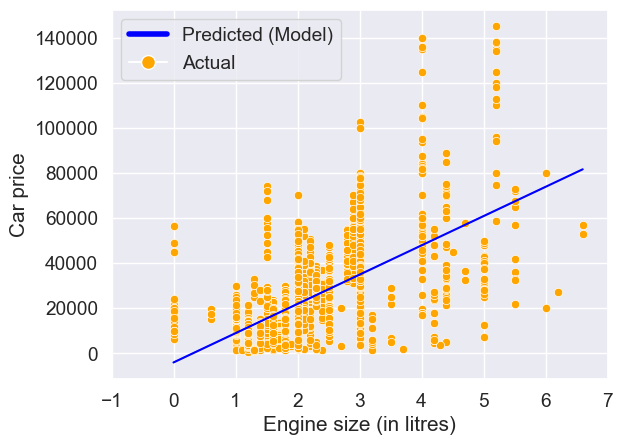

In [ ]:
ax = sns.scatterplot(x=train.engineSize, y=train.price, color="orange")
sns.lineplot(x=train.engineSize, y=model_sm.fittedvalues, color="blue")
plt.xlim(-1, 7)
plt.xlabel("Engine size (in litres)")
plt.ylabel("Car price")
ax.yaxis.set_major_formatter("${x:,.0f}")

legend_elements = [
    Line2D([0], [0], color="blue", lw=4, label="Predicted (Model)"),
    Line2D([0], [0], marker="o", color="w", label="Actual", markerfacecolor="orange", markersize=10),
 ]
ax.legend(handles=legend_elements, loc="upper left");

Note that the above plot can also be made directly using `seaborn.regplot()`. The function `regplot()` fits a simple linear regression model with `y` as the response and `x` as the predictor, then overlays the fitted line on a scatterplot of the data.

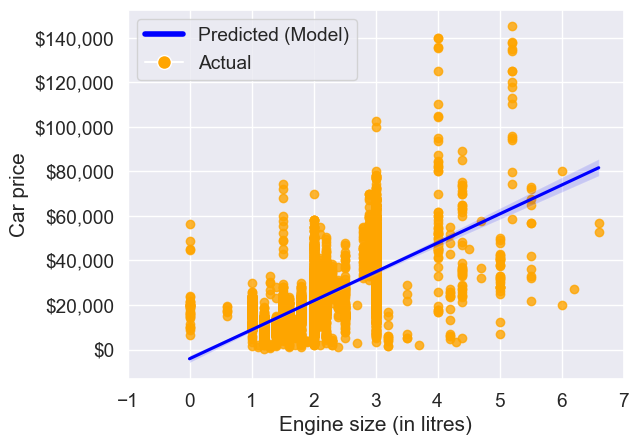

In [ ]:
ax = sns.regplot(
    x="engineSize",
    y="price",
    data=train,
    color="orange",
    line_kws={"color": "blue"},
 )
plt.xlim(-1, 7)
plt.xlabel("Engine size (in litres)")
plt.ylabel("Car price")
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.legend(handles=legend_elements, loc="upper left");

# Note: some `engineSize` values appear to be 0; those are likely data issues
# and should ideally be handled (e.g., imputed/filtered) before modeling.

The light shaded region around the blue line in the above plot is the confidence interval.

**Predict the car price for the cars in the test dataset**. Datasets to be used: *Car_features_test.csv, Car_prices_test.csv*

Now that the model has been trained, let us evaluate it on unseen data. Make sure that the columns names of the predictors are the same in train and test datasets.

**Load the test set for evaluation and intervals.**
We keep training and test data in separate files to avoid leakage.


In [11]:
# Read the test data
testf = pd.read_csv('./Datasets/Car_features_test.csv') # Predictors
testp = pd.read_csv('./Datasets/Car_prices_test.csv') # Response
test = pd.merge(testf, testp)

In [ ]:
# Predict car prices for the test set using the fitted statsmodels model
# (statsmodels will match the predictor name `engineSize` from `testf`).
pred_price = model_sm.predict(testf)

**Make a visualization that compares the predicted car prices with the actual car prices**

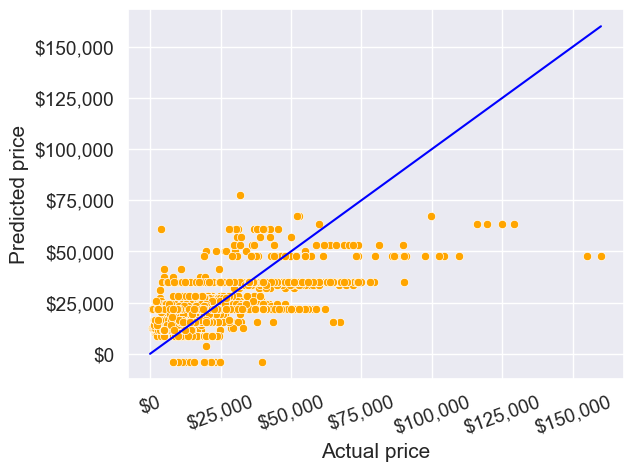

In [13]:
sns.scatterplot(x = testp.price, y = pred_price, color = 'orange')
#In case of a perfect prediction, all the points must lie on the line x = y.
ax = sns.lineplot(x = [0,testp.price.max()], y = [0,testp.price.max()],color='blue') #Plotting the line x = y.
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')
plt.xticks(rotation=20);

The prediction doesn't look too good. This is because we are just using one predictor - engine size. We can probably improve the model by adding more predictors when we learn multiple linear regression.

**What is the RMSE of the predicted car price on unseen data?**

In [ ]:
rmse = np.sqrt(mean_squared_error(testp.price, pred_price))
rmse

12995.106451548696

The root mean squared error in predicting car price is around $13k. 

**What is the residual standard error based on the training data?**

In [15]:
np.sqrt(model_sm.mse_resid)

12810.109175214138

The residual standard error on the training data is close to the RMSE on the test data. This shows that the performance of the model on unknown data is comparable to its performance on known data. This implies that the model is not overfitting, which is good! In case we overfit a model on the training data, its performance on unknown data is likely to be worse than that on the training data.

**Find the confidence and prediction intervals of the predicted car price**

In [16]:
#Using the get_prediction() function associated with the 'model_sm' object to get the intervals
intervals = model_sm.get_prediction(testf)

In [17]:
#The function requires specifying alpha (probability of Type 1 error) instead of the confidence level to get the intervals
intervals.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
1,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
2,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
3,8866.245277,316.580850,8245.606701,9486.883853,-16254.905974,33987.396528
4,47831.088340,468.949360,46911.740050,48750.436631,22700.782946,72961.393735
...,...,...,...,...,...,...
2667,47831.088340,468.949360,46911.740050,48750.436631,22700.782946,72961.393735
2668,34842.807319,271.666459,34310.220826,35375.393812,9723.677232,59961.937406
2669,8866.245277,316.580850,8245.606701,9486.883853,-16254.905974,33987.396528
2670,21854.526298,184.135754,21493.538727,22215.513869,-3261.551421,46970.604017


**Show the regression line predicting car price based on engine size for test data. Also show the confidence and prediction intervals for the car price.**

In [18]:
interval_table = intervals.summary_frame(alpha=0.05)

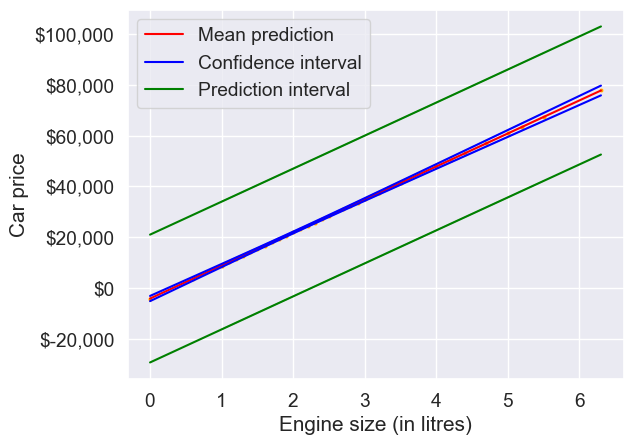

In [19]:
ax = sns.scatterplot(x = testf.engineSize, y = pred_price,color = 'orange', s = 10)
sns.lineplot(x = testf.engineSize, y = pred_price, color = 'red')
sns.lineplot(x = testf.engineSize, y = interval_table.mean_ci_lower, color = 'blue')
sns.lineplot(x = testf.engineSize, y = interval_table.mean_ci_upper, color = 'blue')
sns.lineplot(x = testf.engineSize, y = interval_table.obs_ci_lower, color = 'green')
sns.lineplot(x = testf.engineSize, y = interval_table.obs_ci_upper, color = 'green')

legend_elements = [Line2D([0], [0], color='red', label='Mean prediction'),
                   Line2D([0], [0], color='blue', label='Confidence interval'),
                  Line2D([0], [0], color='green', label='Prediction interval')]
ax.legend(handles=legend_elements, loc='upper left')
plt.xlabel('Engine size (in litres)')
plt.ylabel('Car price')
ax.yaxis.set_major_formatter('${x:,.0f}');

### Training with [`sklearn`](https://scikit-learn.org/stable/)

In `sklearn`, we typically work with:
- `X`: a feature matrix (DataFrame/ndarray)
- `y`: a 1D target vector (Series/1D ndarray)

We can fit the model and evaluate it, but (unlike `statsmodels`) we do not get p-values or confidence intervals from the fitted object.

In [23]:
# Create the sklearn linear regression model
model_skl = LinearRegression()

In [24]:
# Prepare training data (X must be 2D; y should be 1D for sklearn metrics)
X_train = train[["engineSize"]]
y_train = train["price"]

# Fit the model
model_skl.fit(X_train, y_train)

# Inspect fitted parameters
slope = float(model_skl.coef_[0])
intercept = float(model_skl.intercept_)
print(f"Fitted model: price = {intercept:,.2f} + {slope:,.2f} * engineSize")

Fitted model: price = -4,122.04 + 12,988.28 * engineSize


In [27]:
# Prepare test data
X_test = test[["engineSize"]]
y_test = test["price"]

# Predict on test
y_pred = model_skl.predict(X_test)

# Evaluate (train + test)
y_pred_train = model_skl.predict(X_train)

metrics = pd.DataFrame(
    {
        "Split": ["Train", "Test"],
        "RMSE": [
            root_mean_squared_error(y_train, y_pred_train),
            root_mean_squared_error(y_test, y_pred),
        ],
        "MAE": [
            mean_absolute_error(y_train, y_pred_train),
            mean_absolute_error(y_test, y_pred),
        ],
        "R2": [
            r2_score(y_train, y_pred_train),
            r2_score(y_test, y_pred),
        ],
    }
 )

metrics

,Split,RMSE,MAE,R2
0,Train,12807.526232,9260.285302,0.390498
1,Test,12995.106452,9411.325913,0.386990


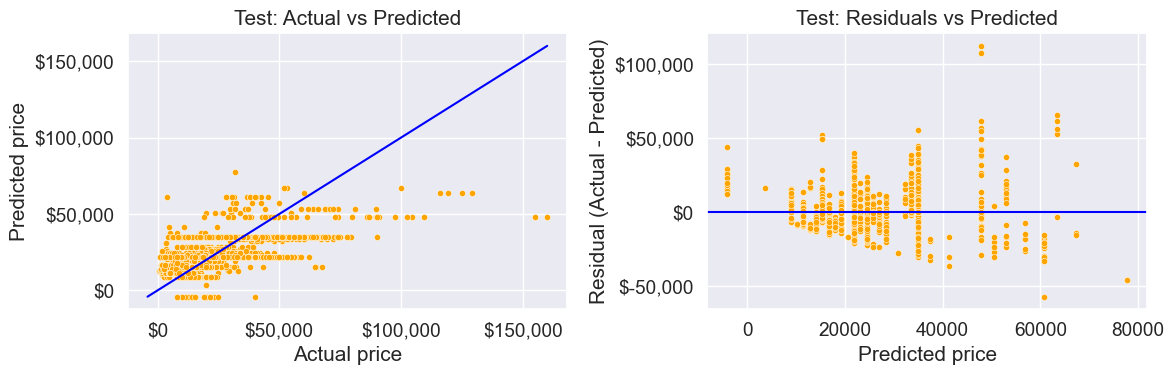

In [26]:
# Quick diagnostics on the test set
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Actual vs Predicted
sns.scatterplot(x=y_test, y=y_pred, color="orange", s=20, ax=axes[0])
min_price = float(min(y_test.min(), y_pred.min()))
max_price = float(max(y_test.max(), y_pred.max()))
axes[0].plot([min_price, max_price], [min_price, max_price], color="blue")
axes[0].set_title("Test: Actual vs Predicted")
axes[0].set_xlabel("Actual price")
axes[0].set_ylabel("Predicted price")
axes[0].xaxis.set_major_formatter("${x:,.0f}")
axes[0].yaxis.set_major_formatter("${x:,.0f}")

# Residuals vs Predicted
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, color="orange", s=20, ax=axes[1])
axes[1].axhline(0, color="blue")
axes[1].set_title("Test: Residuals vs Predicted")
axes[1].set_xlabel("Predicted price")
axes[1].set_ylabel("Residual (Actual - Predicted)")
axes[1].yaxis.set_major_formatter("${x:,.0f}")

plt.tight_layout()

**Note:** Why did we repeat the same task in two different libraries?

- `statsmodels` is great for *inference* (standard errors, p-values, confidence intervals).
- `sklearn` is great for *prediction workflows* (pipelines, preprocessing, model catalog, cross-validation).
- For the same linear model, you should expect the fitted line (coefficients) to match across libraries (up to numerical rounding), but the outputs you get “for free” differ a lot.